In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics


In [2]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:2:1
df = pd.read_csv('D:/Năm 3/Học kỳ 2/ThucHanhPTDK/Holt winters/NFLX.csv')
df = df[['Open']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

<Axes: title={'center': 'Open Data'}>

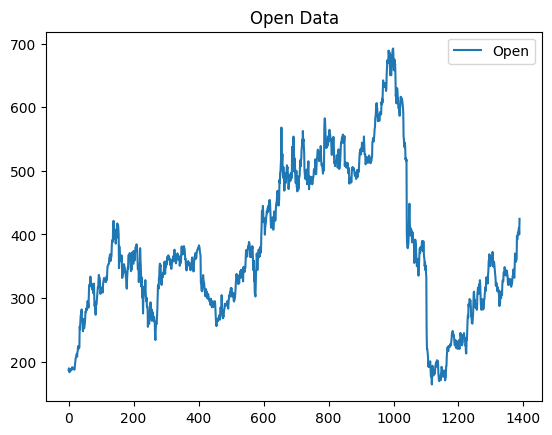

In [3]:
df[['Open']].plot(title='Open Data')

In [4]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Open'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [5]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Open'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Open'])
y_pred_val =  model.predict(x_val)

In [6]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[675.42920132 675.73901046 676.04881961 676.35862876 676.66843791
 676.97824706 677.28805621 677.59786536 677.9076745  678.21748365
 678.5272928  678.83710195 679.1469111  679.45672025 679.76652939
 680.07633854 680.38614769 680.69595684 681.00576599 681.31557514
 681.62538428 681.93519343 682.24500258 682.55481173 682.86462088
 683.17443003 683.48423918 683.79404832 684.10385747 684.41366662]


In [7]:
# 7. Đánh giá độ chính xác validate, test
print("Testing Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, y_pred), 4))
print("Testing Mean Squared Error:", round(metrics.mean_squared_error(y_test, y_pred), 4))
print("Testing Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 4))

print("Validation Mean Absolute Error:", round(metrics.mean_absolute_error(y_val, y_pred_val), 4))
print("Validation Mean Squared Error:", round(metrics.mean_squared_error(y_val, y_pred_val), 4))
print("Validation Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)), 4))

Testing Mean Absolute Error: 269.3972
Testing Mean Squared Error: 91338.4674
Testing Root Mean Squared Error: 302.2225
Validation Mean Absolute Error: 323.6902
Validation Mean Squared Error: 105385.3832
Validation Root Mean Squared Error: 324.6311


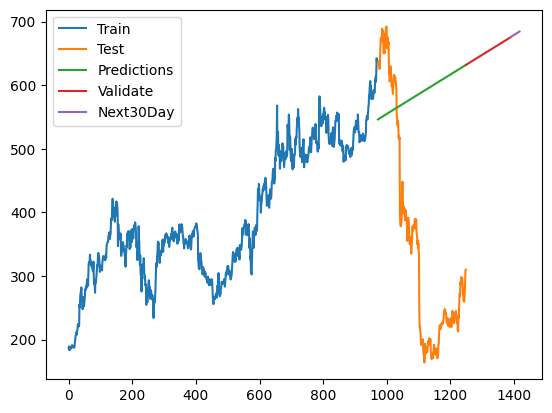

In [9]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Open'])
plt.plot(test_data.index, test_data['Open'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [10]:
test_data.index

RangeIndex(start=972, stop=1249, step=1)